<a href="https://colab.research.google.com/github/Ludmila-Vivas/Aprendizaje-Automatico-1/blob/main/Preprocesamiento_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocesamiento  -  Titanic**

🔍 Descarga y exploración del dataset

In [3]:
import pandas as pd

url= "https://raw.githubusercontent.com/fernandoabcampos/titanic-data-cleaning-and-validation/refs/heads/master/train.csv"
df= pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


🚫 Manejo de valores nulos

In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
#Reemplazar valores nulos en Age
df.loc[df["Age"] == 0,:]
df["Age"].median()
df["Age"] = df["Age"].fillna(df["Age"].median())

In [18]:
#Reemplazar valores nulos en Embarked
df["Embarked"].mode()[0]
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [20]:
#Eliminar las columnas que sigan conteniendo nulos
df = df.drop(['Cabin'], axis=1)

In [22]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


📊 Detección de datos atípicos


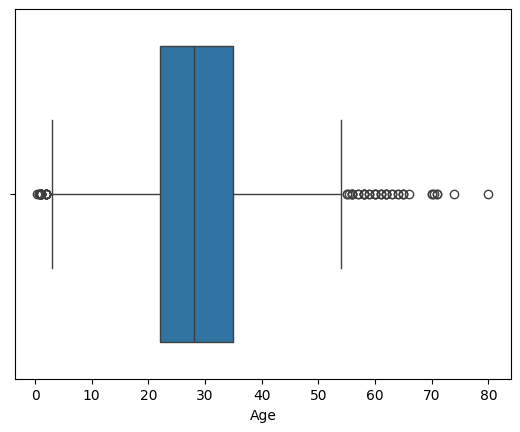

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x = df["Age"])
plt.show()

⚖️ Normalización y estandarización

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalización
scaler_norm= MinMaxScaler()
df["Fare-norm"] = scaler_norm.fit_transform(df[["Fare"]])

# Estandarización
scaler_std= StandardScaler()
df["Age-std"] = scaler_std.fit_transform(df[["Age"]])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-norm,Age-std
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.014151,-0.565736
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.139136,0.663861
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.015469,-0.258337
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.103644,0.433312
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.015713,0.433312


🔡 Codificación de variables categóricas

In [32]:
# One-hot encoding sobre las columnas categóricas 'Sex', 'PClass' y 'Embarked'
df = pd.get_dummies(df, columns=["Sex", "Pclass", "Embarked"])
df.head()

,Survived,Fare-norm,Age-std,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,0.014151,-0.565736,False,False,True,False,False,True,False,True
1,1,0.139136,0.663861,True,False,False,True,False,False,True,False
2,1,0.015469,-0.258337,False,False,True,False,False,True,True,False
3,1,0.103644,0.433312,True,False,False,False,False,True,True,False
4,0,0.015713,0.433312,False,False,True,False,False,True,False,True


📋 Selección de variables

In [ ]:
df = df.drop(["PassengerId","Name", "Age", "SibSp", "Parch", "Ticket", "Fare",], axis=1)
df.head()

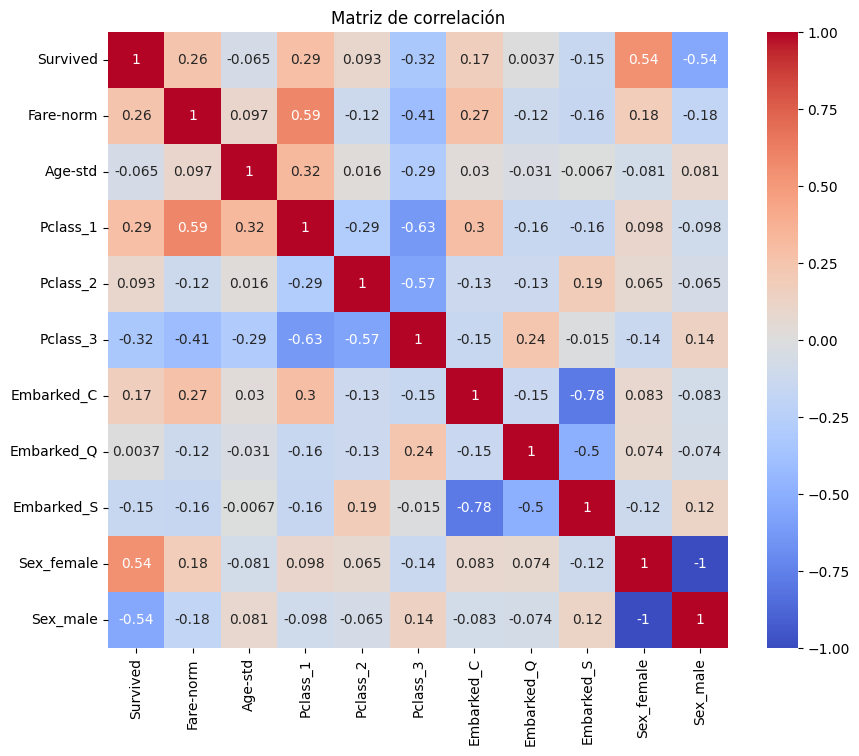

In [34]:
# Correlación de variables numéricas
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()